# Shallow Neural Network in TensorFlow

Build a shallow neural network to classify handwritten digits

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jonkrohn/DLTFpT/blob/master/notebooks/shallow_net_in_tensorflow.ipynb)

In [1]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.
'C:\Users\Sasana' is not recognized as an internal or external command,
operable program or batch file.


#### Load dependencies

In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

#### Load data

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

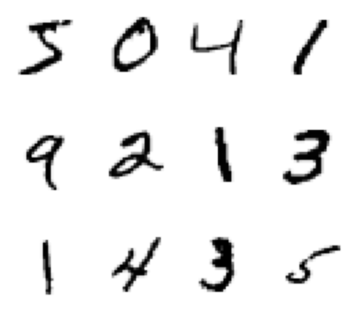

In [6]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
X_valid.shape

(10000, 28, 28)

In [8]:
y_valid.shape

(10000,)

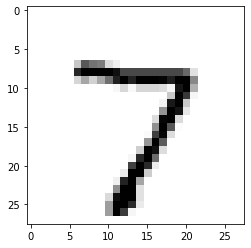

In [9]:
plt.imshow(X_valid[0], cmap='Greys')

In [10]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
y_valid[0]

7

#### Preprocess data

In [12]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [13]:
X_train /= 255
X_valid /= 255

In [14]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [16]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Design neural network architecture

In [17]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [19]:
(64*784)

50176

In [20]:
(64*784)+64

50240

In [21]:
(10*64)+10

650

#### Configure model

In [22]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

#### Train!

In [23]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0926 - accuracy: 0.1010 - val_loss: 0.0917 - val_accuracy: 0.1092
Epoch 2/200
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0914 - accuracy: 0.1149 - val_loss: 0.0909 - val_accuracy: 0.1264
Epoch 3/200
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0907 - accuracy: 0.1404 - val_loss: 0.0903 - val_accuracy: 0.1551
Epoch 4/200
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0902 - accuracy: 0.1852 - val_loss: 0.0899 - val_accuracy: 0.2138
Epoch 5/200
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0897 - accuracy: 0.2314 - val_loss: 0.0895 - val_accuracy: 0.2520
Epoch 6/200
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0894 - accuracy: 0.2581 - val_loss: 0.0891 - val_accuracy: 0.2758
Epoch 7/200
60000/60000 [=========================

Epoch 55/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0689 - accuracy: 0.4933 - val_loss: 0.0684 - val_accuracy: 0.4991
Epoch 56/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0685 - accuracy: 0.4992 - val_loss: 0.0680 - val_accuracy: 0.5041
Epoch 57/200
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0680 - accuracy: 0.5052 - val_loss: 0.0675 - val_accuracy: 0.5112
Epoch 58/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0676 - accuracy: 0.5112 - val_loss: 0.0671 - val_accuracy: 0.5178
Epoch 59/200
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0672 - accuracy: 0.5171 - val_loss: 0.0666 - val_accuracy: 0.5239
Epoch 60/200
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0667 - accuracy: 0.5240 - val_loss: 0.0662 - val_accuracy: 0.5307
Epoch 61/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0663 - ac

60000/60000 [==============================] - 1s 17us/sample - loss: 0.0480 - accuracy: 0.7494 - val_loss: 0.0471 - val_accuracy: 0.7626
Epoch 110/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0477 - accuracy: 0.7511 - val_loss: 0.0468 - val_accuracy: 0.7636
Epoch 111/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0473 - accuracy: 0.7535 - val_loss: 0.0464 - val_accuracy: 0.7647
Epoch 112/200
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0470 - accuracy: 0.7555 - val_loss: 0.0461 - val_accuracy: 0.7665
Epoch 113/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0467 - accuracy: 0.7573 - val_loss: 0.0458 - val_accuracy: 0.7689
Epoch 114/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0464 - accuracy: 0.7594 - val_loss: 0.0455 - val_accuracy: 0.7698
Epoch 115/200
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0461 - accuracy:

60000/60000 [==============================] - 1s 19us/sample - loss: 0.0346 - accuracy: 0.8321 - val_loss: 0.0335 - val_accuracy: 0.8428
Epoch 164/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0344 - accuracy: 0.8331 - val_loss: 0.0333 - val_accuracy: 0.8437
Epoch 165/200
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0342 - accuracy: 0.8339 - val_loss: 0.0331 - val_accuracy: 0.8444
Epoch 166/200
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0340 - accuracy: 0.8351 - val_loss: 0.0330 - val_accuracy: 0.8450
Epoch 167/200
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0339 - accuracy: 0.8361 - val_loss: 0.0328 - val_accuracy: 0.8459
Epoch 168/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0337 - accuracy: 0.8367 - val_loss: 0.0326 - val_accuracy: 0.8461
Epoch 169/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0335 - accuracy:

#### Evaluating model performance

In [33]:
model.evaluate(X_valid, y_valid)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.0281 - accuracy: 0.8615


[0.0280743247166276, 0.8615]

#### Performing inference

In [30]:
valid_0 = X_valid[0].reshape(1, 784)

In [31]:
model.predict(valid_0)

array([[0.00426445, 0.00120947, 0.00195153, 0.00495256, 0.0119504 ,
        0.00838872, 0.0009802 , 0.9227693 , 0.00250606, 0.04102722]],
      dtype=float32)

In [32]:
model.predict_classes(valid_0)

array([7])